In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('capmetro_UT.csv')
df.isna().sum()
print('Before cleaning df count =',df.shape[0])
df = df.dropna()
df.isna().sum()
print('After cleaning df count =',df.shape[0])
df

Before cleaning df count = 5824
After cleaning df count = 5824


,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend
...,...,...,...,...,...,...,...,...
5819,2018-11-30 20:45:00,43,29,Fri,70.73,20,Nov,weekday
5820,2018-11-30 21:00:00,24,19,Fri,69.88,21,Nov,weekday
5821,2018-11-30 21:15:00,33,16,Fri,69.88,21,Nov,weekday
5822,2018-11-30 21:30:00,25,15,Fri,69.88,21,Nov,weekday


Daily, Hourly, temperature, weekend/weekday, monthly

In [136]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Weekend'] = df['day_of_week'].isin(['Sat','Sun']).astype(int)
df['Ridership'] = df['boarding'] + df['alighting']
# df[['date','time']] = df['timestamp'].str.split(' ',expand = True)
df['day_of_month'] = df['timestamp'].dt.day
df

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,Weekend,Ridership,day_of_month
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,1,1,1
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,1,3,1
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend,1,7,1
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend,1,7,1
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...
5819,2018-11-30 20:45:00,43,29,Fri,70.73,20,Nov,weekday,0,72,30
5820,2018-11-30 21:00:00,24,19,Fri,69.88,21,Nov,weekday,0,43,30
5821,2018-11-30 21:15:00,33,16,Fri,69.88,21,Nov,weekday,0,49,30
5822,2018-11-30 21:30:00,25,15,Fri,69.88,21,Nov,weekday,0,40,30


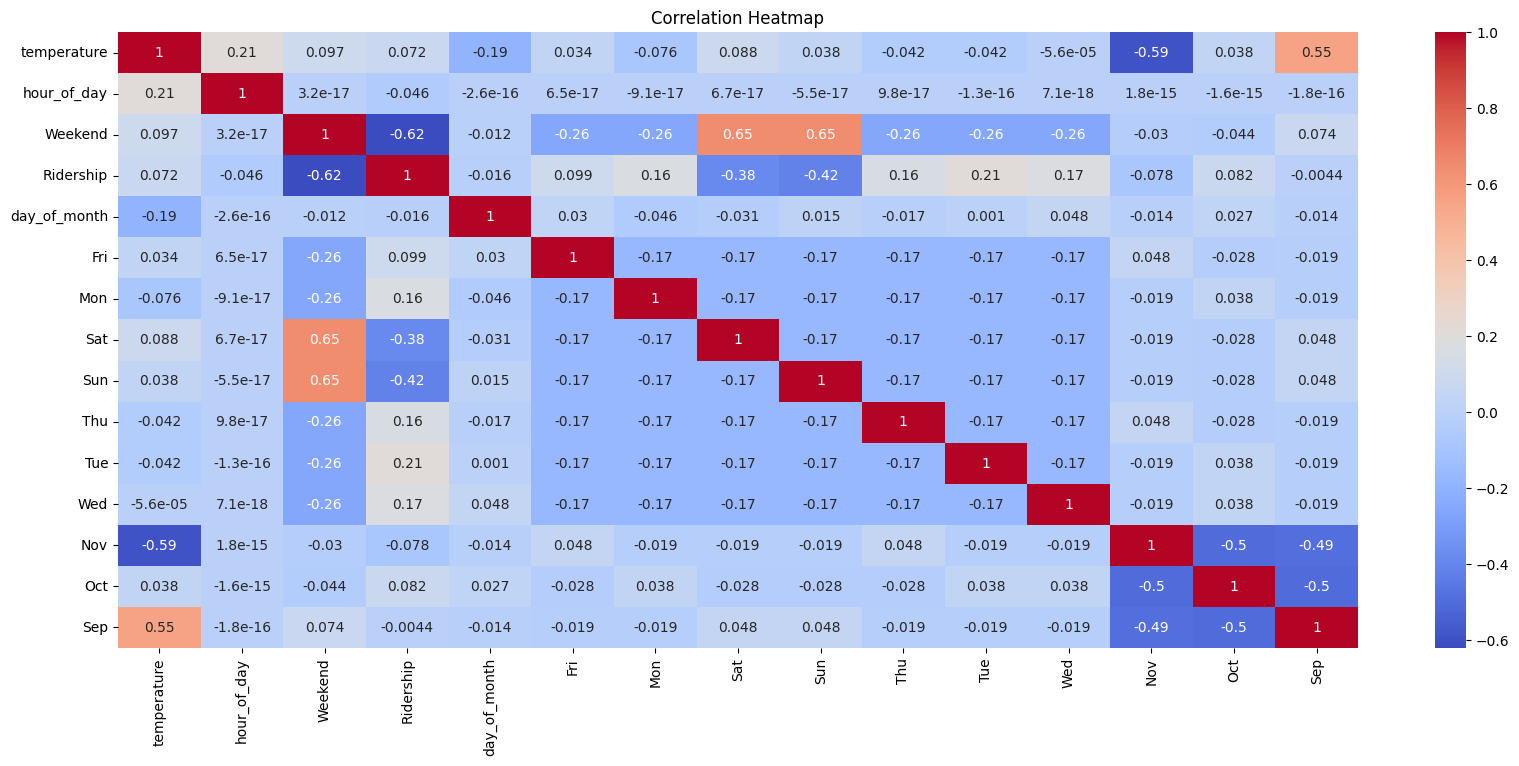

In [137]:
dw_df = pd.get_dummies(df['day_of_week'])
mt_df = pd.get_dummies(df['month'])
df_f = pd.concat([df, dw_df,mt_df], axis=1)
columns_to_drop = ['timestamp','boarding','day_of_week','alighting','weekend','month']
correlation_matrix = (df_f.drop(columns=columns_to_drop)).corr()

plt.figure(figsize=(20, 8))  # Adjust the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')#, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

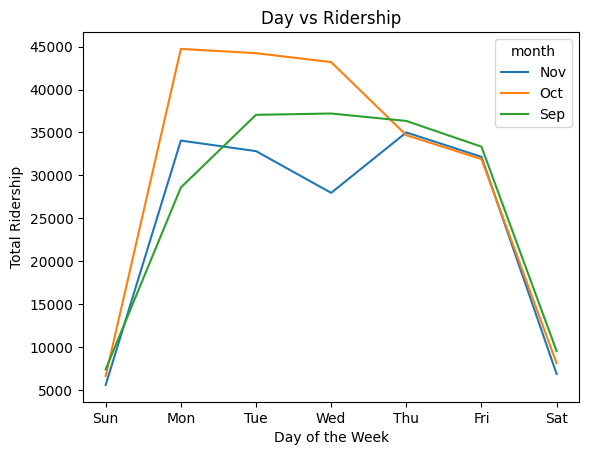

In [138]:
day_of_week = df.groupby(['month','day_of_week'])['Ridership'].sum()  
day_of_week_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
day_of_week = day_of_week.reset_index()
day_of_week = day_of_week.set_index('day_of_week')
# day_of_week = day_of_week.reindex(day_of_week_order)
day_of_week = day_of_week.loc[day_of_week_order]
day_of_week
sns.lineplot(x=day_of_week.index, y=day_of_week['Ridership'], hue= day_of_week['month'])

# Add labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Total Ridership")
plt.title("Day vs Ridership")

plt.show()


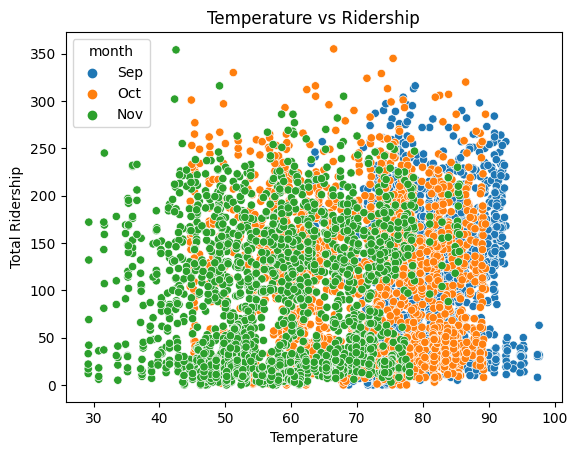

In [139]:
sns.scatterplot(x=df['temperature'], y=df['Ridership'], hue= df['month'])

# Add labels and title
plt.xlabel("Temperature")
plt.ylabel("Total Ridership")
plt.title("Temperature vs Ridership")

plt.show()

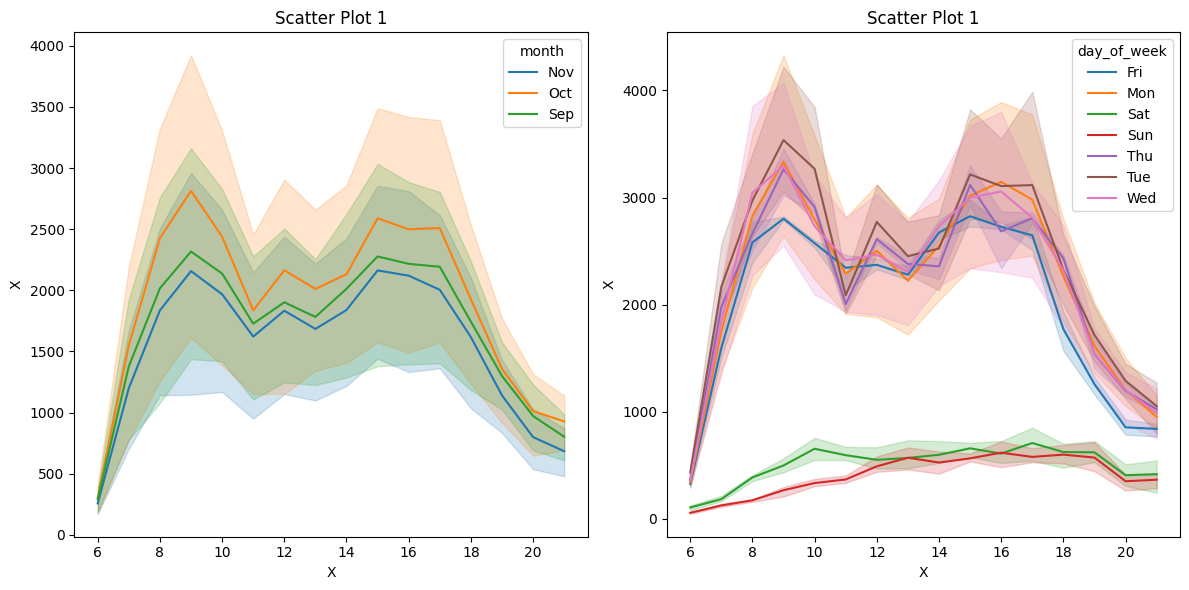

In [140]:
hours_of_day = df.groupby(['month','day_of_week','hour_of_day'])['Ridership'].sum()  
# day_of_week_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
hours_of_day = hours_of_day.reset_index()
hours_of_day = hours_of_day.set_index('hour_of_day')
hours_of_day



fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(x=hours_of_day.index, y=hours_of_day['Ridership'], hue= hours_of_day['month'], ax= axes[0])
# Add labels and title
axes[0].set_xlabel("X")
axes[0].set_ylabel("X")
axes[0].set_title("Scatter Plot 1")

sns.lineplot(x=hours_of_day.index, y=hours_of_day['Ridership'], hue= hours_of_day['day_of_week'], ax= axes[1])
# Add labels and title
axes[1].set_xlabel("X")
axes[1].set_ylabel("X")
axes[1].set_title("Scatter Plot 1")

plt.tight_layout()
plt.show()

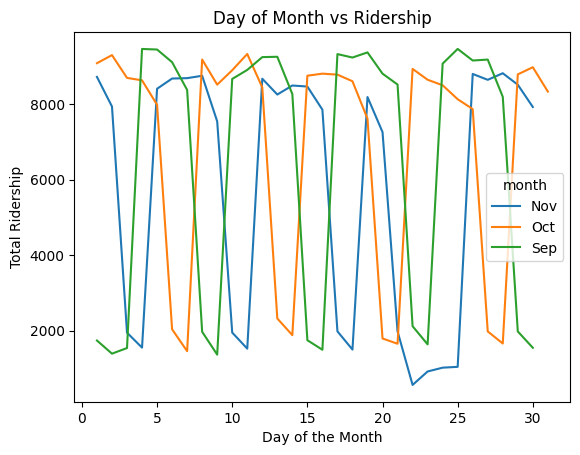

In [141]:
day_of_month = df.groupby(['month','day_of_month'])['Ridership'].sum()  
day_of_month_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
day_of_month = day_of_month.reset_index()
day_of_month = day_of_month.set_index('day_of_month')
# day_of_month = day_of_month.reindex(day_of_month_order)
# day_of_month = day_of_month.loc[day_of_month_order]
day_of_month
sns.lineplot(x=day_of_month.index, y=day_of_month['Ridership'], hue= day_of_month['month'])

# Add labels and title
plt.xlabel("Day of the Month")
plt.ylabel("Total Ridership")
plt.title("Day of Month vs Ridership")

plt.show()